# Selecting the best polynomial regression using k-fold cross-validation

In this notebook we explore how to pick the best polynomial regression to approximate a non-linear conditional expectation function (CEF) using cross-validation.

We will also investigate how the best degree of the best polynomial changes when we increase the sample size.

## Functions to simulate data and compute cross-validated MSE

The code below provides functions to simulate the data and compute the cross-validated MSE (using k-fold cross-validation).

In [1]:
import numpy as np
import pandas as pd
import math
# function to simulate DGP
def sim_data(n=100):
    x=np.random.uniform(-math.pi,math.pi,n)
    y=np.sin(x)+np.random.normal(0,1,n)
    out=pd.DataFrame( {'x': x, 'y':y})
    return(out)

# function to compute k-fold CV MSE for polynomial regression
def cv_mse(data,d=1,k=5):
    x=data['x'].values
    y=data['y'].values
    # create folds randomly
    n=len(data)
    folds=np.random.choice((list(np.arange(k)) * (math.ceil(n/k)))[:n], size=n,replace=False)
    # create vector to store results
    mse = np.zeros(k)
    for j in range(k):
        # train model on all folds except j
        idx=(folds != j)
        model=np.poly1d(np.polyfit(x[idx], y[idx], d))
        # compute MSE on fold j (not used for training)
        yhat = model(x[~idx])
        mse[j]=np.mean((y[~idx] - yhat)**2)
        
    # return average mse
    return(np.mean(mse))

# Sample of size 100

Let's start with a sample of size n = 100. In this simulation, the best degree turns out to be 3.

In [2]:
np.random.seed(1)

# simulate sample of size n = 100
data_1e2 = sim_data(n = 100)

In [3]:
# compute MSE's for d from 1 to 10
result=np.zeros(10)
for i in range(10):
    result[i]=cv_mse(data=data_1e2,d=i+1)

In [4]:
# best degree
best_1e2=np.argmin(result)+1
best_1e2

3

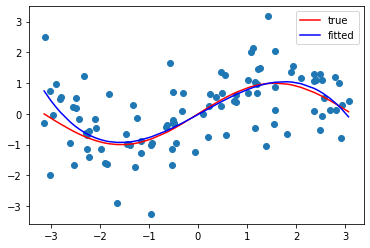

In [5]:
x=data_1e2['x'].values
y=data_1e2['y'].values
# fit model using best degree
ols=np.poly1d(np.polyfit(x, y, best_1e2))

# predicted values
yhat = ols(x)

plot_data=data_1e2.sort_values("x")
# plot against data and true CEF
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(plot_data['x'],np.sin(plot_data['x']),label="true",color='red')
plt.plot(plot_data['x'],ols(plot_data['x']),label="fitted",color='blue')
plt.legend()
plt.show()

# Sample size 1000

Now let us increase the sample size to n = 1,000. The best degree is now 4.

In [6]:
np.random.seed(1)

# simulate sample of size n = 100
data_1e3 = sim_data(n = 1000)

In [7]:
# compute MSE's for d from 1 to 10
result=np.zeros(10)
for i in range(10):
    result[i]=cv_mse(data=data_1e3,d=i+1)

In [8]:
# best degree
best_1e3=np.argmin(result)+1
best_1e3

4

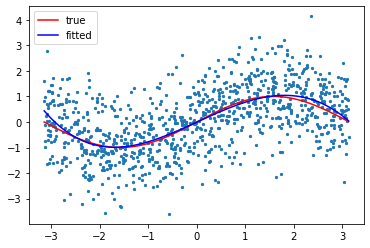

In [9]:
x=data_1e3['x'].values
y=data_1e3['y'].values
# fit model using best degree
ols=np.poly1d(np.polyfit(x, y, best_1e3))

# predicted values
yhat = ols(x)

plot_data=data_1e3.sort_values("x")
# plot against data and true CEF
import matplotlib.pyplot as plt
plt.scatter(x,y,s=5)
plt.plot(plot_data['x'],np.sin(plot_data['x']),label="true",color='red')
plt.plot(plot_data['x'],ols(plot_data['x']),label="fitted",color='blue')
plt.legend()
plt.show()